## 本节内容
- 1、numpy简介
- 2、ndarray介绍
- 3、numpy安装
- 4、numpy基础用法
- 5、numpy数组广播

## 一、什么是 NumPy?
NumPy是一个功能强大的Python库，主要用于对多维数组执行计算。NumPy这个词来源于两个单词-- `Numerical`和`Python`。NumPy提供了大量的库函数和操作，可以帮助程序员轻松地进行数值计算。这类数值计算广泛用于以下任务：

- **机器学习模型**：在编写机器学习算法时，需要对矩阵进行各种数值计算。例如矩阵乘法、换位、加法等。NumPy提供了一个非常好的库，用于简单(在编写代码方面)和快速(在速度方面)计算。NumPy数组用于存储训练数据和机器学习模型的参数。
- **图像处理和计算机图形学**：计算机中的图像表示为多维数字数组。NumPy成为同样情况下最自然的选择。实际上，NumPy提供了一些优秀的库函数来快速处理图像。例如，镜像图像、按特定角度旋转图像等。
- **数学任务**：NumPy对于执行各种数学任务非常有用，如数值积分、微分、内插、外推等。因此，当涉及到数学任务时，它形成了一种基于Python的MATLAB的快速替代。

## 二、Ndarray对象
从`ndarray`对象提取的任何元素（通过切片）由一个数组标量类型的 Python 对象表示。 下图显示了`ndarray`，数据类型对象（`dtype`）和数组标量类型之间的关系。
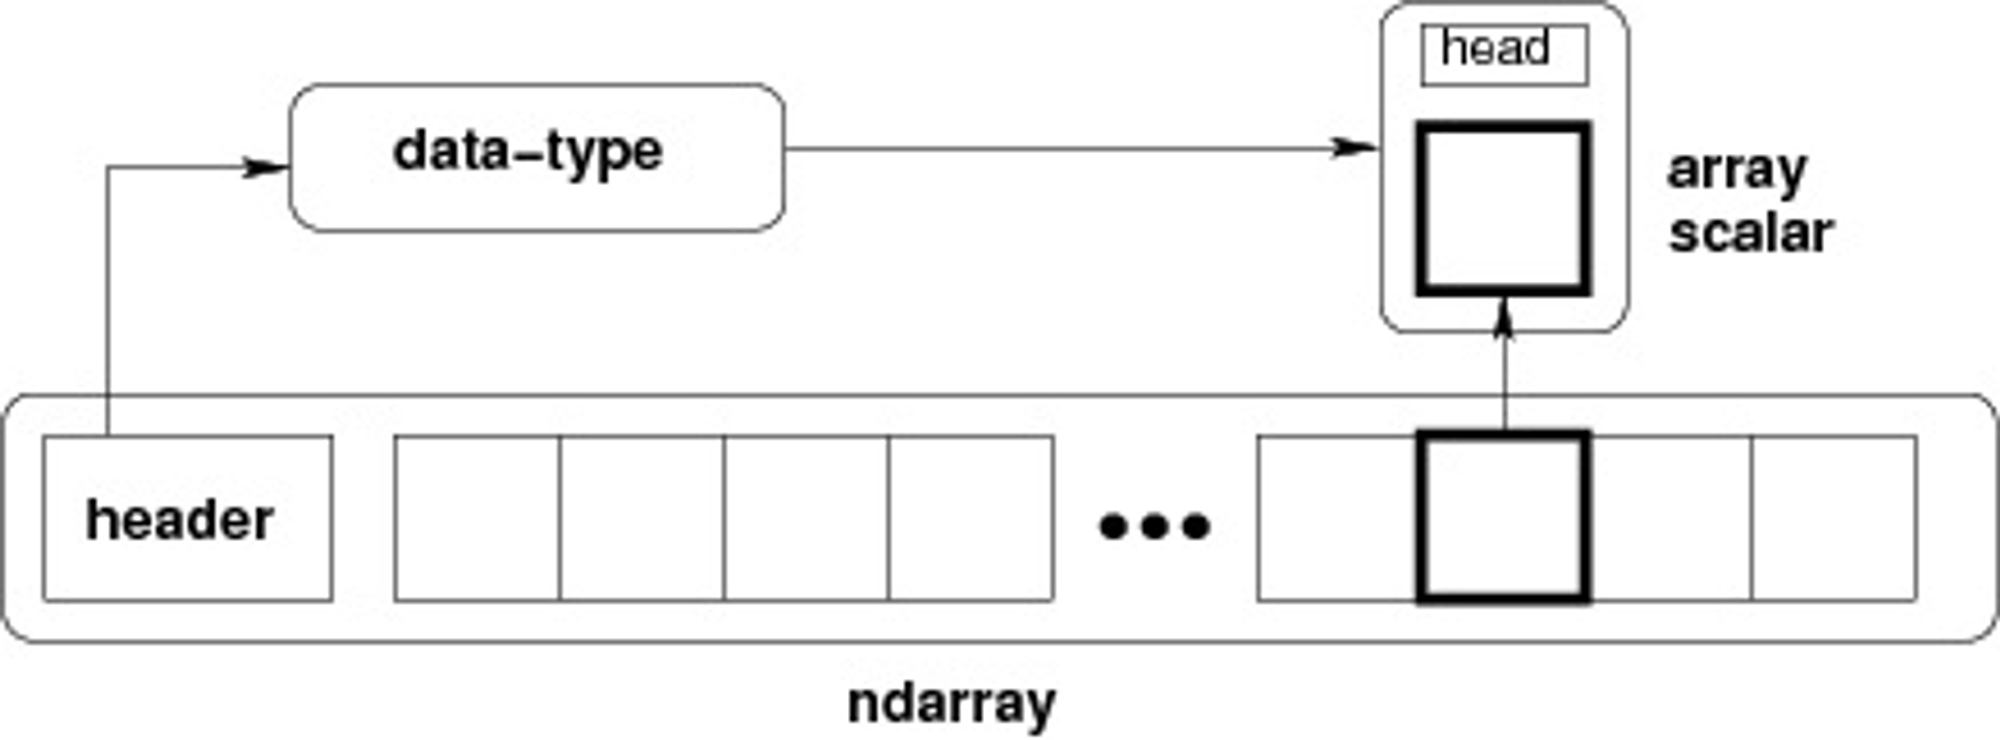
它从任何暴露数组接口的对象，或从返回数组的任何方法创建一个ndarray。

```python
numpy.array(object, dtype = None, copy = True, order = None, subok = False, ndmin = 0)
```
参数说明：
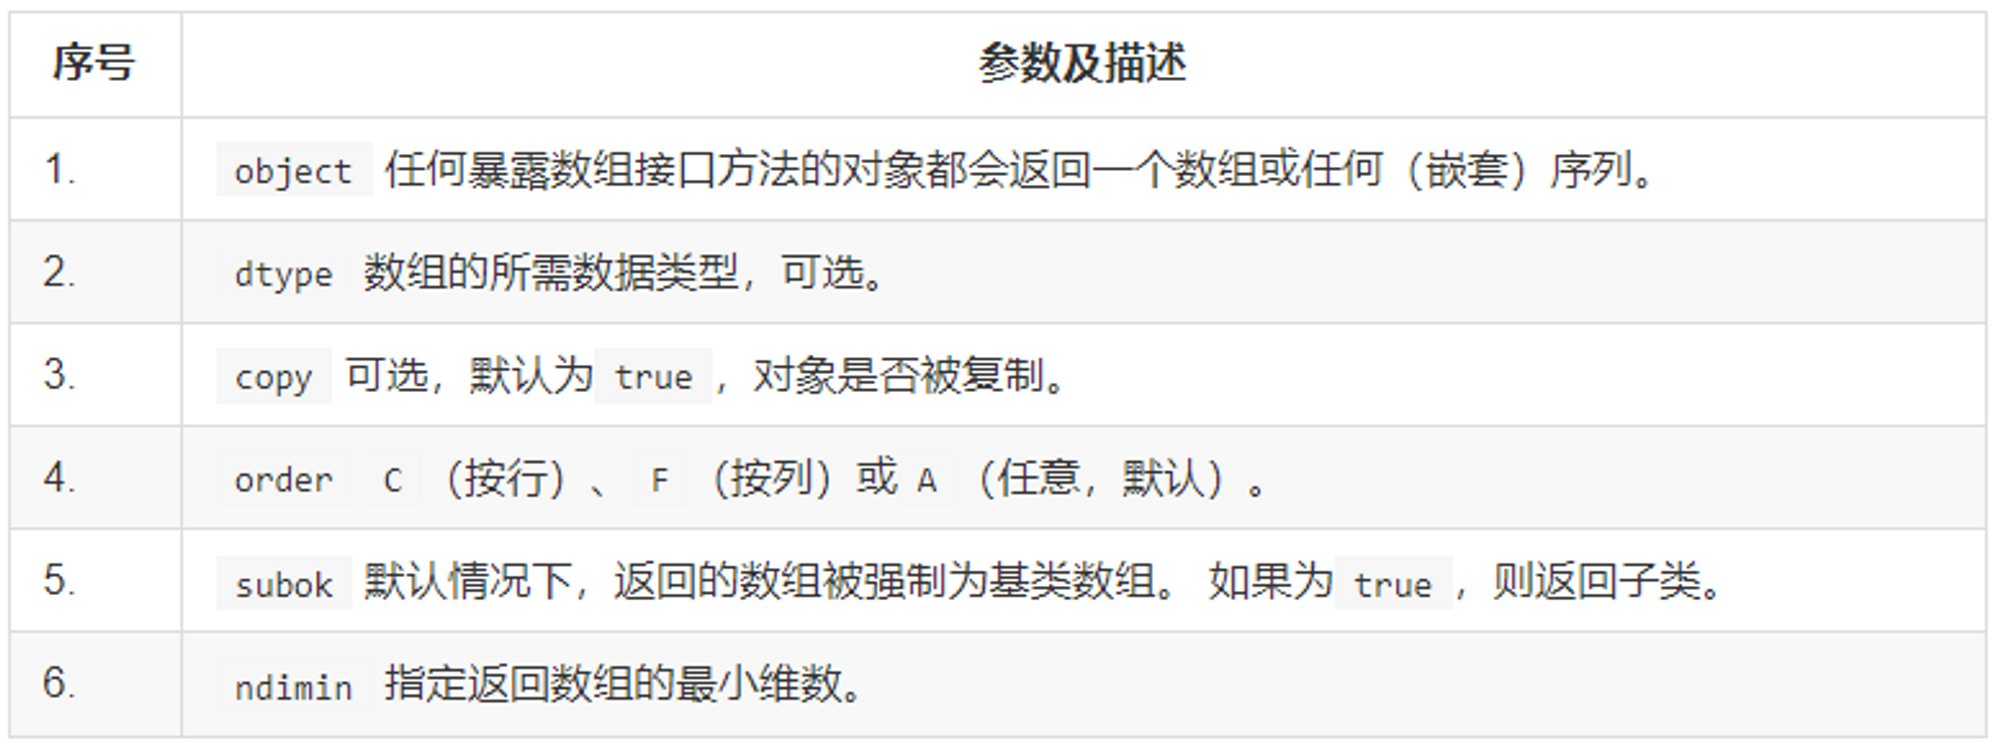

## 三、安装numpy
- 安装numpy

!pip install numpy -i https://pypi.tuna.tsinghua.edu.cn/simple
- 安装jupyter

!pip install jupyter notebook -i https://pypi.tuna.tsinghua.edu.cn/simple

## 四、基础用法(重要)

### 4.1、为什么要用numpy

比如：我要针对一个数组的元素都乘以2，有2种做法

In [4]:
# 方法一
num_list=[1,2,3,4,5,6]
ret_list = []
for num in num_list:
    ret_list.append(num*2)
print(ret_list)
print("-----------------")

# 方案二
np_array = np.array(num_list)
print(np_array*2)

[2, 4, 6, 8, 10, 12]
-----------------
[ 2  4  6  8 10 12]


### 4.2、各维度数据定义：
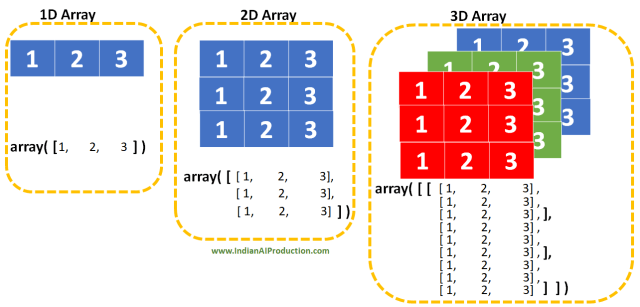

In [2]:
# 创建ndarray数据
import numpy as np 
# 一维数组
a = np.array([1,2,3])
a_ = np.array((1,2,3))  
# 二维数组
b = np.array([[1,  2],  
              [3,  4]])
# 三维数组
c = np.array([[[1,  2],  
              [3,  4]],
              [[1,  2],  
              [3,  4]]])
print(a)
print("-----------------")
print(a_)
print("-----------------")
print(b)
print("-----------------")
print(c)

[1 2 3]
-----------------
[1 2 3]
-----------------
[[1 2]
 [3 4]]
-----------------
[[[1 2]
  [3 4]]

 [[1 2]
  [3 4]]]


### 4.3 查看数组信息

In [3]:
print(a.shape)
print("-----------------")
print(b.shape)
print("-----------------")
print(c.shape)

(3,)
-----------------
(2, 2)
-----------------
(2, 2, 2)


## 五、数据类型

### 5.1、numpy数据类型
NumPy 支持比 Python 更多种类的数值类型。 下表显示了 NumPy 中定义的不同标量数据类型。

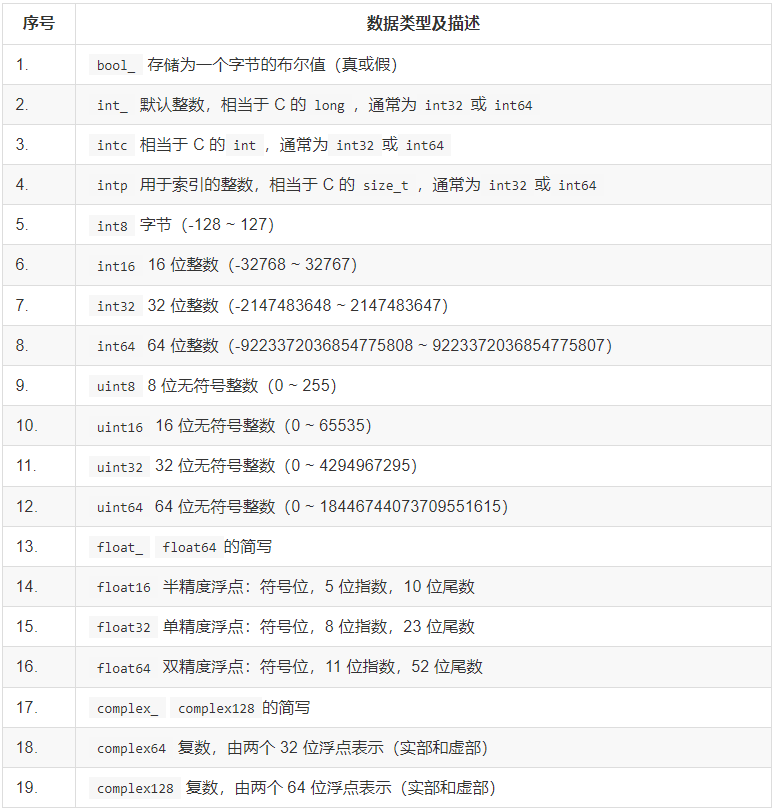

NumPy 数字类型是dtype（数据类型）对象的实例，每个对象具有唯一的特征

### 5.2、类型对象（dtype）
dtype可由一下语法构造：

```python
numpy.dtype(object, align, copy)
```

参数为：
- Object：被转换为数据类型的对象。
- Align：如果为true，则向字段添加间隔，使其类似 C 的结构体。
- Copy ? 生成dtype对象的新副本，如果为flase，结果是内建数据类型对象的引用。

In [3]:
# 使用数组标量类型  
# #int8，int16，int32，int64 可替换为等价的字符串 'i1'，'i2'，'i4'，以及其他。  
import numpy as np 
dt = np.dtype(np.int32)  
dt_ = np.dtype('i4')
print(dt)
print("----------------")
print(dt_)

int32
----------------
int32


In [9]:
# 创建结构化数据类型
dt = np.dtype([('age',np.int8)]) 
a = np.array([(10,),(20,),(30,)], dtype = dt)
print(dt)
print(a['age'])

[('age', 'i1')]
[10 20 30]


## 5.4、常量（只需有印象即可）

常用的常量如下：

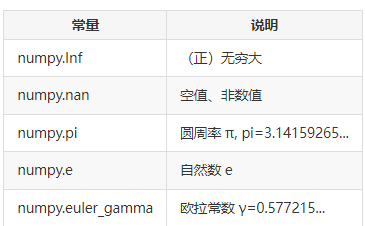

In [12]:
# 无穷大
# inf
print(np.inf)
# 它是一个浮点型
print(type(np.inf))
# float

a = np.array([np.inf, -np.inf, 1])
# 显示哪些元素是正无穷大或负无穷大
np.isinf(a) # array([ True,  True, False])

inf
<class 'float'>


array([ True,  True, False])

In [13]:
#自然数 e
print(type(np.e))
# float
print(np.e)
# 2.718281828459045

<class 'float'>
2.718281828459045


In [15]:
#圆周率 
print(type(np.pi))
# float
print(np.pi)
# 3.141592653589793

<class 'float'>
3.141592653589793


### 5.5、广播(重要)
广播（Array Broadcasting）：描述的是 NumPy 如何计算不同形状的数组之间的运算。如果是较大的矩阵和较小的矩阵进行运算的话，较小的矩阵就会被广播，从而保证运算的正确进行。

如果满足以下规则，可以进行广播：
- ndim较小的数组会在前面追加一个长度为 1 的维度。
- 输出数组的每个维度的大小是输入数组该维度大小的最大值。
- 如果输入在每个维度中的大小与输出大小匹配，或其值正好为 1，则在计算中可它。
- 如果输入的某个维度大小为 1，则该维度中的第一个数据元素将用于该维度的所有计算。

如果上述规则产生有效结果，并且满足以下条件之一，那么数组被称为可广播的。
- 数组拥有相同形状。
- 数组拥有相同的维数，每个维度拥有相同长度，或者长度为 1。
- 数组拥有极少的维度，可以在其前面追加长度为 1 的维度，使上述条件成立。

In [4]:
a = np.array([[0.0,0.0,0.0],[10.0,10.0,10.0],[20.0,20.0,20.0],[30.0,30.0,30.0]])
print ('a shape：')  
print(a.shape)
b = np.array([1.0,2.0,3.0])
print ('b shape：')  
print(b.shape)
print ('第一个数组：')  
print(a) 
print ('\n')  
print ('第二个数组：')  
print(b) 
print ('\n')  
print ('\n')  
print ('第一个数组加第二个数组：')  
print(a + b)
print ('\n')  


a shape：
(4, 3)
b shape：
(3,)
第一个数组：
[[ 0.  0.  0.]
 [10. 10. 10.]
 [20. 20. 20.]
 [30. 30. 30.]]


第二个数组：
[1. 2. 3.]




第一个数组加第二个数组：
[[ 1.  2.  3.]
 [11. 12. 13.]
 [21. 22. 23.]
 [31. 32. 33.]]




图片展示了数组b如何通过广播来与数组a兼容:

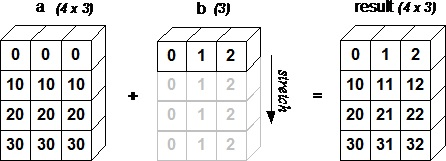

In [5]:
print(a+1)

[[ 1.  1.  1.]
 [11. 11. 11.]
 [21. 21. 21.]
 [31. 31. 31.]]
